In [49]:
# Info:

# Author:
# Date

# Purpose:

# inputs:

# outputs:

# Version control:

#------------------------------------------------------------------------------

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import copy

In [51]:
# Import as pandas dataframes
data = pd.read_csv('Bank_dataset.csv')

# data.describe()

In [52]:
# Get the x and y data
x = data.iloc[:1000, 3:13]
y = data.iloc[:1000, 13]

In [53]:
'''
# fix the nan -------------------------
# method 1: delete the rows
dum = ~np.isnan (data_analysis)
new_data = data_analysis[dum]

# Or get indeses
inds = np.where(np.isfinite(data_analysis[:,0]))
new_data = data_analysis[inds]

# method 2: replace nan with mean
inds2 = np.where(np.isnan(data_analysis[:,0]))

#new_data = data_analysis
new_data = np.copy(data_analysis)

mean_of_col = np.nanmean(new_data, axis=0)

new_data[inds2] = mean_of_col
'''

'\n# fix the nan -------------------------\n# method 1: delete the rows\ndum = ~np.isnan (data_analysis)\nnew_data = data_analysis[dum]\n\n# Or get indeses\ninds = np.where(np.isfinite(data_analysis[:,0]))\nnew_data = data_analysis[inds]\n\n# method 2: replace nan with mean\ninds2 = np.where(np.isnan(data_analysis[:,0]))\n\n#new_data = data_analysis\nnew_data = np.copy(data_analysis)\n\nmean_of_col = np.nanmean(new_data, axis=0)\n\nnew_data[inds2] = mean_of_col\n'

In [54]:
# Encoding categorical featuers------------------
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoder_x1 = LabelEncoder()
x.iloc[:, 1] = encoder_x1.fit_transform(x.iloc[:, 1])

encoder_x2 = LabelEncoder()
x.iloc[:, 2] = encoder_x2.fit_transform(x.iloc[:, 2])

In [55]:
# One hot encoder
# onehotencoder = OneHotEncoder()
# x_hot_en = onehotencoder.fit_transform(x['Geography'])

In [56]:
# Feature Scaling -------------------------------
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2,\
                                                    random_state = 0)

In [58]:
# size/shape of dataframe
n_samples = x_train.shape[0]
n_featuers = x_train.shape[1]

In [59]:
# Make the NN -----------------------------------------------------------------

# Importing the Keras libraries and packages
from keras.layers import Dense
from keras.models import Sequential

# define and initialize the model
my_classifier = Sequential()

# Adding the input layer AND the first hidden layer (Pay attention to this)
my_classifier.add(Dense(units = 20, kernel_initializer = 'uniform',
                        activation = 'relu', input_dim = n_featuers))

# Adding the second hidden layer
my_classifier.add(Dense(units = 8, kernel_initializer = 'uniform',
                        activation = 'relu'))

# Adding the last (output) layer
my_classifier.add(Dense(units = 1, kernel_initializer = 'uniform',
                        activation = 'sigmoid'))

# Compiling the ANN
my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

#my_classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
#                      metrics = ['accuracy'])

In [60]:
#-- plot the model
# from keras.utils import plot_model
# plot_model(my_classifier, to_file='model.png', show_shapes=True)

In [68]:
# Fitting the ANN to the Training set
history = my_classifier.fit(x_train, y_train, validation_split=0.2,
                            batch_size = 10, epochs = 500)

Epoch 1/500
64/64 [==============================] - 0s 6ms/step - loss: 0.2326 - accuracy: 0.9016 - val_loss: 0.3907 - val_accuracy: 0.8438
Epoch 2/500
64/64 [==============================] - 0s 6ms/step - loss: 0.2325 - accuracy: 0.9031 - val_loss: 0.3969 - val_accuracy: 0.8313
Epoch 3/500
64/64 [==============================] - 0s 6ms/step - loss: 0.2322 - accuracy: 0.9078 - val_loss: 0.3922 - val_accuracy: 0.8188
Epoch 4/500
64/64 [==============================] - 0s 6ms/step - loss: 0.2333 - accuracy: 0.9062 - val_loss: 0.3897 - val_accuracy: 0.8250
Epoch 5/500
64/64 [==============================] - 0s 6ms/step - loss: 0.2299 - accuracy: 0.9078 - val_loss: 0.3903 - val_accuracy: 0.8313
Epoch 6/500
64/64 [==============================] - 0s 6ms/step - loss: 0.2343 - accuracy: 0.8984 - val_loss: 0.4002 - val_accuracy: 0.8313
Epoch 7/500
64/64 [==============================] - 0s 6ms/step - loss: 0.2307 - accuracy: 0.9094 - val_loss: 0.4045 - val_accuracy: 0.8375
Epoch 8/500
6

In [62]:
# Make predictions
# Predicting the Test set results
y_pred_train = my_classifier.predict(x_train)
y_pred_train = (y_pred_train > 0.5)

2022-01-14 19:25:11.167958: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [63]:
# Predicting the Test set results
y_pred_test = my_classifier.predict(x_test)
y_pred_test = (y_pred_test > 0.5)

2022-01-14 19:25:11.250483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[154,  11],
       [ 26,   9]])

In [65]:
# list all the data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


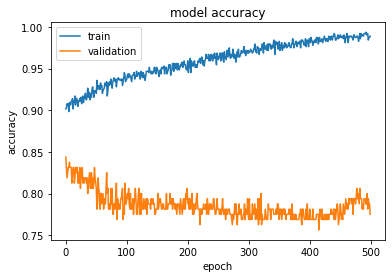

In [69]:
# Plot the accuracy for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

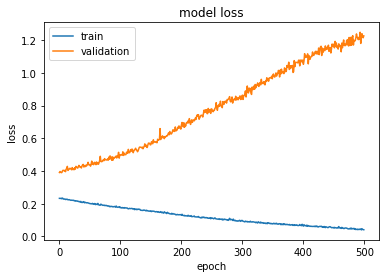

In [70]:
# Plot the loss for both train and validation set
plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()